In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=083b633c248158602076499e3d8d7201


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | loanda
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | pokhara
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | natal
Processing Record 13 of Set 1 | hualmay
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | longlac
City not found. Skipping...
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | narsaq
Processing Record 23 of Set 

Processing Record 35 of Set 4 | aklavik
Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | labuhan
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 4 | tocopilla
Processing Record 41 of Set 4 | udon thani
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | balkanabat
Processing Record 44 of Set 4 | la grande
Processing Record 45 of Set 4 | coihueco
Processing Record 46 of Set 4 | stromness
Processing Record 47 of Set 4 | sur
Processing Record 48 of Set 4 | neiafu
Processing Record 49 of Set 4 | atbasar
Processing Record 50 of Set 4 | arlit
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | shelburne
Processing Record 4 of Set 5 | sansare
Processing Record 5 of Set 5 | jumla
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | mtinko
Proces

Processing Record 29 of Set 8 | baykit
Processing Record 30 of Set 8 | shingu
Processing Record 31 of Set 8 | bethel
Processing Record 32 of Set 8 | bengkulu
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | inirida
Processing Record 35 of Set 8 | airai
Processing Record 36 of Set 8 | vao
Processing Record 37 of Set 8 | megion
Processing Record 38 of Set 8 | alugan
Processing Record 39 of Set 8 | biak
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | navahrudak
Processing Record 43 of Set 8 | shirokiy
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | ambon
Processing Record 46 of Set 8 | ouadda
Processing Record 47 of Set 8 | ahipara
Processing Record 48 of Set 8 | lakes entrance
Processing Record 49 of Set 8 | tumut
Processing Record 50 of Set 8 | coffs harbour
Processing Record 1 of Set 9 | ratnagiri
Processing Record 2 of Set 9 | a

Processing Record 15 of Set 12 | vila
Processing Record 16 of Set 12 | bongandanga
Processing Record 17 of Set 12 | kaeo
Processing Record 18 of Set 12 | touros
Processing Record 19 of Set 12 | iberia
Processing Record 20 of Set 12 | turtas
Processing Record 21 of Set 12 | caraballeda
Processing Record 22 of Set 12 | kruszwica
Processing Record 23 of Set 12 | penticton
Processing Record 24 of Set 12 | dasoguz
Processing Record 25 of Set 12 | kaka
Processing Record 26 of Set 12 | ziro
Processing Record 27 of Set 12 | hailey
Processing Record 28 of Set 12 | xam nua
Processing Record 29 of Set 12 | heihe
Processing Record 30 of Set 12 | priupskiy
Processing Record 31 of Set 12 | kurilsk
Processing Record 32 of Set 12 | zhuhai
Processing Record 33 of Set 12 | monaghan
Processing Record 34 of Set 12 | vila franca do campo
Processing Record 35 of Set 12 | xuchang
Processing Record 36 of Set 12 | nacala
Processing Record 37 of Set 12 | caluquembe
Processing Record 38 of Set 12 | najran
Proces

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,75.22,73,0,11.50,AR,2022-04-06 22:59:20
1,Barrow,71.2906,-156.7887,-7.58,71,0,9.22,US,2022-04-06 23:00:47
2,Castro,-24.7911,-50.0119,64.38,93,46,2.35,BR,2022-04-06 23:00:47
3,Loanda,-8.8368,13.2343,76.68,85,68,6.64,AO,2022-04-06 23:00:02
4,Lorengau,-2.0226,147.2712,79.02,89,100,9.86,PG,2022-04-06 23:00:48
5,Pokhara,28.2333,83.9833,69.37,36,49,5.82,NP,2022-04-06 23:00:48
6,Kapaa,22.0752,-159.3190,80.58,74,18,5.01,US,2022-04-06 23:00:48
7,Mataura,-46.1927,168.8643,50.00,60,96,3.49,NZ,2022-04-06 23:00:49
8,Cape Town,-33.9258,18.4232,58.91,75,40,4.61,ZA,2022-04-06 22:55:56
9,Margate,51.3813,1.3862,51.12,78,100,11.01,GB,2022-04-06 23:00:49


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-04-06 22:59:20,-38.0023,-57.5575,75.22,73,0,11.50
1,Barrow,US,2022-04-06 23:00:47,71.2906,-156.7887,-7.58,71,0,9.22
2,Castro,BR,2022-04-06 23:00:47,-24.7911,-50.0119,64.38,93,46,2.35
3,Loanda,AO,2022-04-06 23:00:02,-8.8368,13.2343,76.68,85,68,6.64
4,Lorengau,PG,2022-04-06 23:00:48,-2.0226,147.2712,79.02,89,100,9.86
...,...,...,...,...,...,...,...,...,...
573,Savasleyka,RU,2022-04-06 23:15:33,55.4606,42.3207,29.01,90,83,6.78
574,Kapoeta,SS,2022-04-06 23:15:33,4.7717,33.5903,85.19,39,30,17.63
575,Mayskiy,RU,2022-04-06 23:15:34,47.6931,40.1025,40.41,76,7,5.61
576,Sidi Ali,DZ,2022-04-06 23:15:03,36.0998,0.4206,51.80,86,15,8.25


In [12]:
city_data_df.count()

City          578
Country       578
Date          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
dtype: int64

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

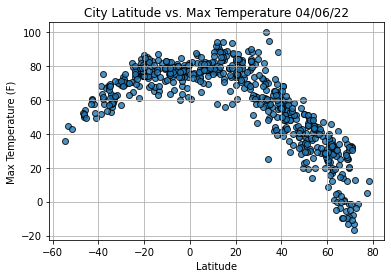

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

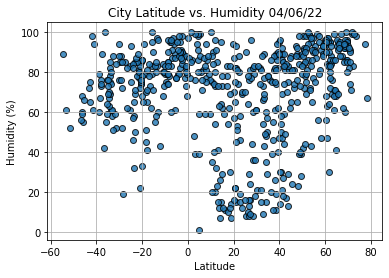

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

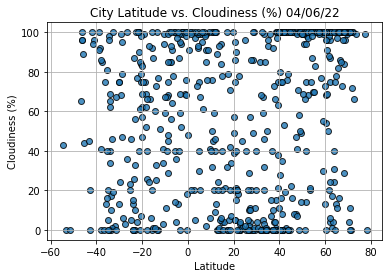

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

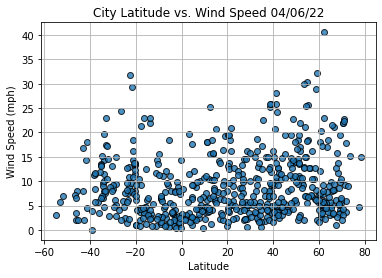

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Victoria
Country                        HK
Date          2022-04-06 22:59:21
Lat                       22.2855
Lng                      114.1577
Max Temp                    70.32
Humidity                       80
Cloudiness                     78
Wind Speed                   5.99
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

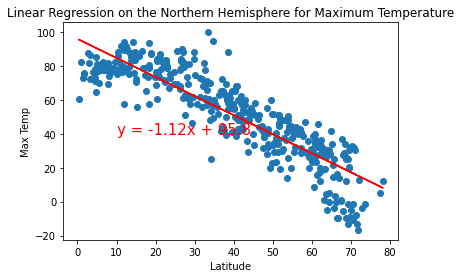

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

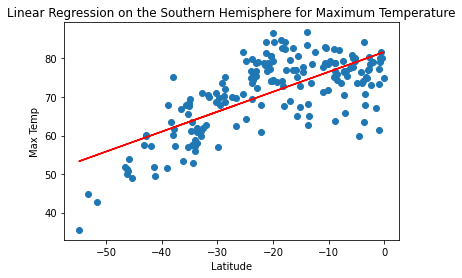

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

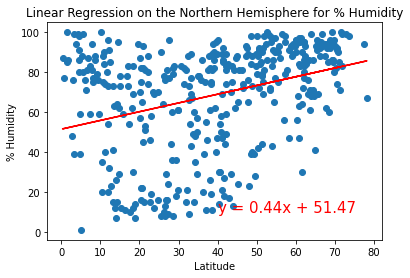

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

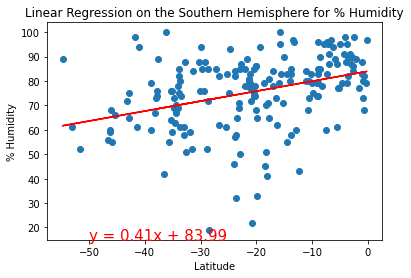

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

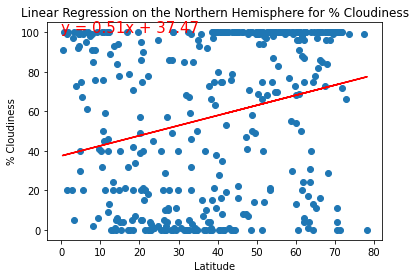

In [34]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,100))

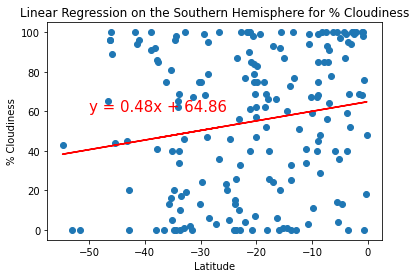

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

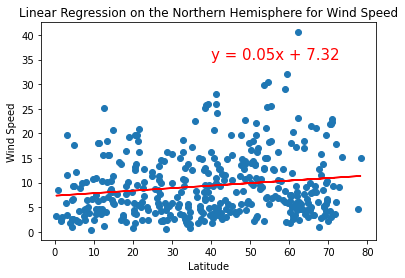

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

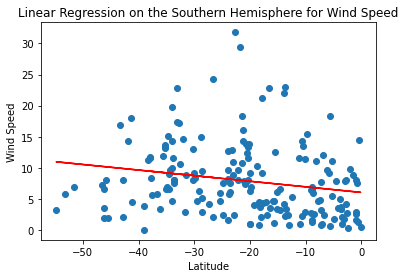

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))